# 一、数据预览

In [1]:
import pandas as pd

file = 'file/truth_weibo.csv'

# df = pd.read_csv(file, error_bad_lines=False)
df = pd.read_csv(file)

print(df.columns)
print()
print(df.dtypes)

Index(['name', 'userCertify', 'userWeiboCount', 'userFollowCount',
       'userFanCount', 'forward', 'praise', 'pic_num'],
      dtype='object')

name               object
userCertify         int64
userWeiboCount     object
userFollowCount    object
userFanCount       object
forward            object
praise             object
pic_num             int64
dtype: object


/Users/snow/anaconda2/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# del df['Unnamed: 7']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154114 entries, 0 to 154113
Data columns (total 8 columns):
name               154114 non-null object
userCertify        154114 non-null int64
userWeiboCount     154114 non-null object
userFollowCount    154114 non-null object
userFanCount       154114 non-null object
forward            154064 non-null object
praise             154114 non-null object
pic_num            154114 non-null int64
dtypes: int64(2), object(6)
memory usage: 9.4+ MB


### 部分缺失值处理

In [3]:
df['userWeiboCount'] = df['userWeiboCount'].apply(lambda x : int(x) if x != 'None' else 0).astype('int')
df['userFollowCount'] = df['userFollowCount'].apply(lambda x : int(x) if x != 'None' else 0).astype('int')
df['userFanCount'] = df['userFanCount'].apply(lambda x : int(x) if x != 'None' else 0).astype('int')
df['praise'] = df['praise'].apply(lambda x : int(x) if x != 'None' else 0).astype('int')
df['forward'] = df['forward'].apply(lambda x : int(x) if x != 'None' and type(x) != float else 0).astype('int')

df.info()

# for i in range(len(df['forward'])):
#     try:
#         int(df['forward'][i])
#     except:
#         if df['forward'][i] != 'None':
#             print(df['forward'][i])
#             print(type(df['forward'][i]))
#             print
#             break

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154114 entries, 0 to 154113
Data columns (total 8 columns):
name               154114 non-null object
userCertify        154114 non-null int64
userWeiboCount     154114 non-null int64
userFollowCount    154114 non-null int64
userFanCount       154114 non-null int64
forward            154114 non-null int64
praise             154114 non-null int64
pic_num            154114 non-null int64
dtypes: int64(7), object(1)
memory usage: 9.4+ MB


In [4]:
df.head()

,name,userCertify,userWeiboCount,userFollowCount,userFanCount,forward,praise,pic_num
0,曲阜123网,0,1243,1186,995,0,1,0
1,媒体人徐传强,1,6245,780,787,0,0,0
2,网易新闻临沂站,2,11318,167,482,0,0,1
3,第一视频,2,8991,710,1360000,3,1,1
4,中国警察网大案要案频道,2,7019,614,36007,0,2,1


In [5]:
# pd.set_option('precision', 3)
# pd.option_context('display.float_format', lambda x: '%.3f' % x)

df.describe()

,userCertify,userWeiboCount,userFollowCount,userFanCount,forward,praise,pic_num
count,154114.000000,1.541140e+05,154114.000000,1.541140e+05,1.541140e+05,1.541140e+05,154114.000000
mean,1.052377,2.712565e+04,847.080551,2.373356e+06,2.189266e+02,3.768572e+02,1.304807
std,0.914695,1.242013e+05,1151.372523,6.974617e+06,1.088807e+04,9.161994e+03,1.958172
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,1.594000e+03,186.000000,8.290000e+02,0.000000e+00,0.000000e+00,0.000000
50%,1.000000,9.656500e+03,467.000000,5.404350e+04,0.000000e+00,2.000000e+00,1.000000
75%,2.000000,3.799400e+04,1069.000000,1.020000e+06,7.000000e+00,1.400000e+01,1.000000
max,2.000000,3.238033e+07,22112.000000,1.610900e+08,2.721798e+06,1.537993e+06,10.000000


# 二、特征工程

In [6]:
# encoding:utf-8

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# sns.set(style='whitegrid')
sns.set()
sz = (15,8)

## 0. 概览

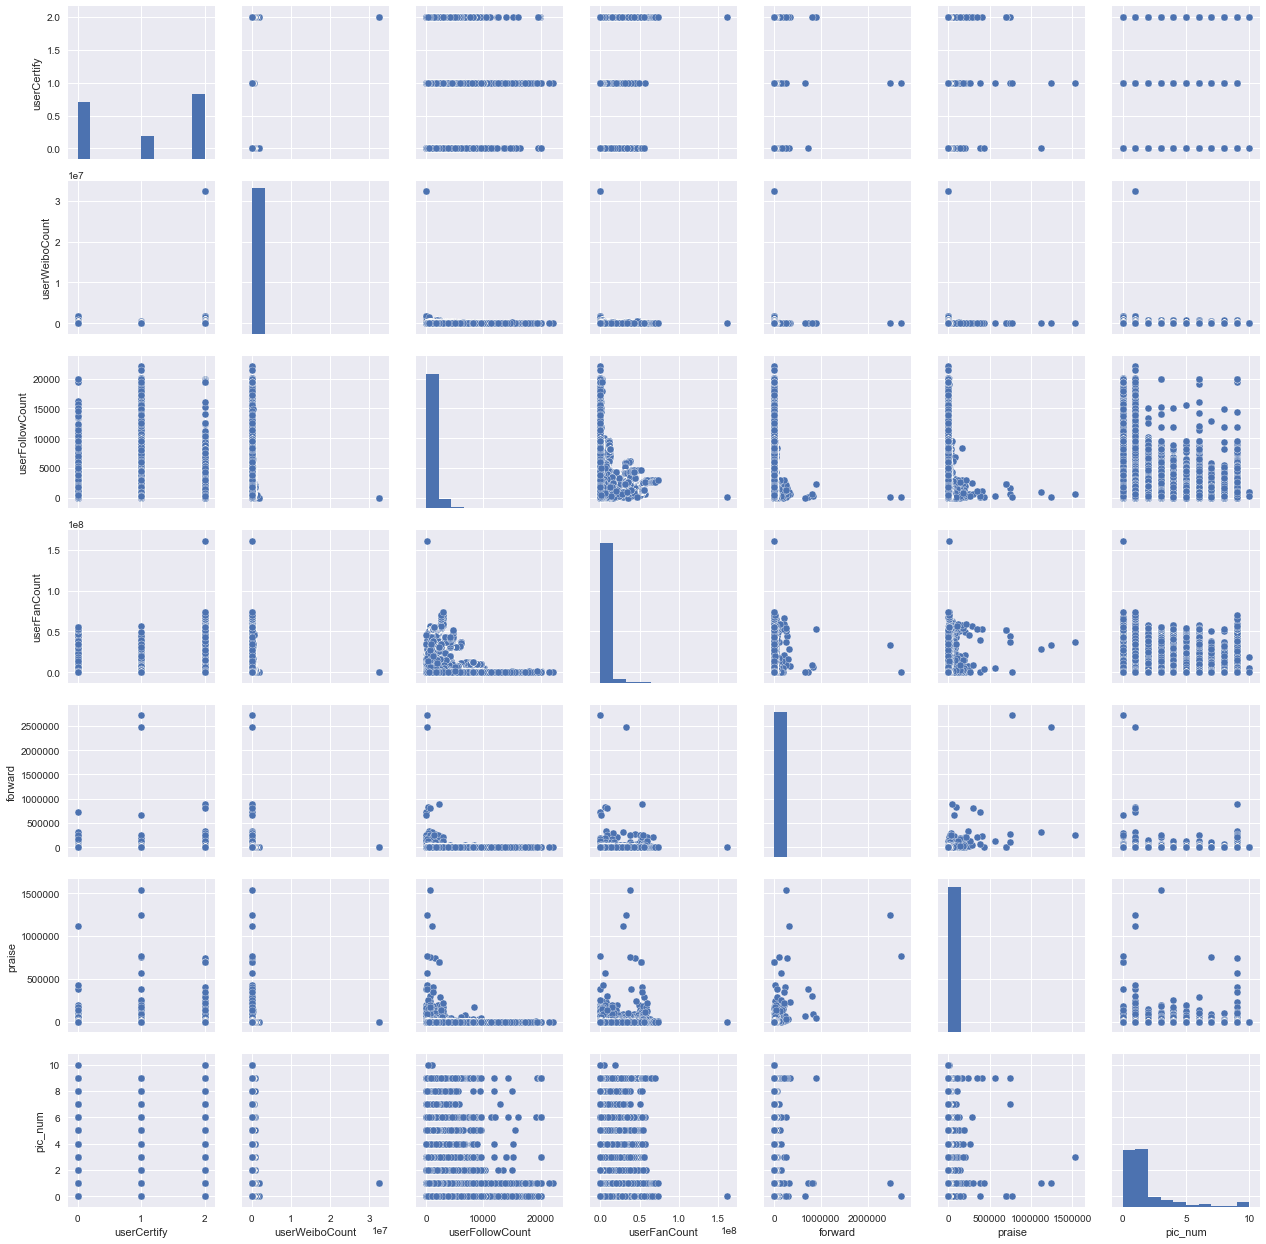

In [7]:
sns.pairplot(df)

## 1.1 用户认证情况

([<matplotlib.axis.XTick at 0x11de93e48>,
 <a list of 3 Text xticklabel objects>)

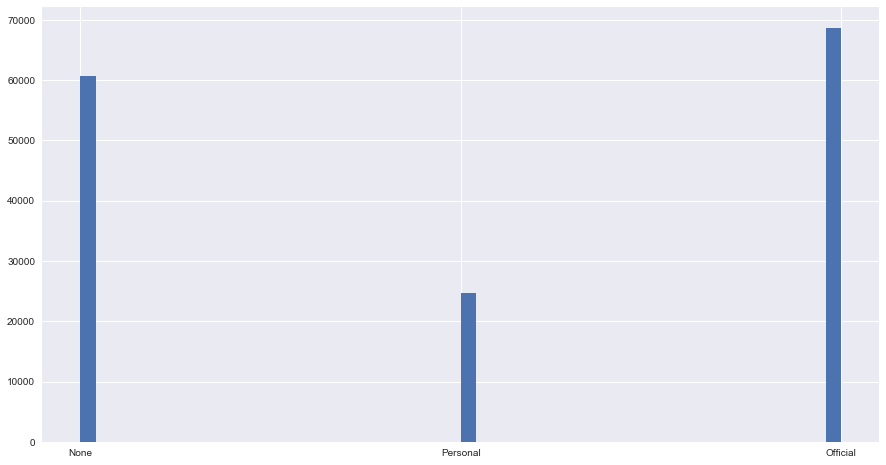

In [7]:
df['userCertify'].hist(figsize=sz, bins=50)
plt.xticks([0, 1, 2], ['None','Personal','Official'])

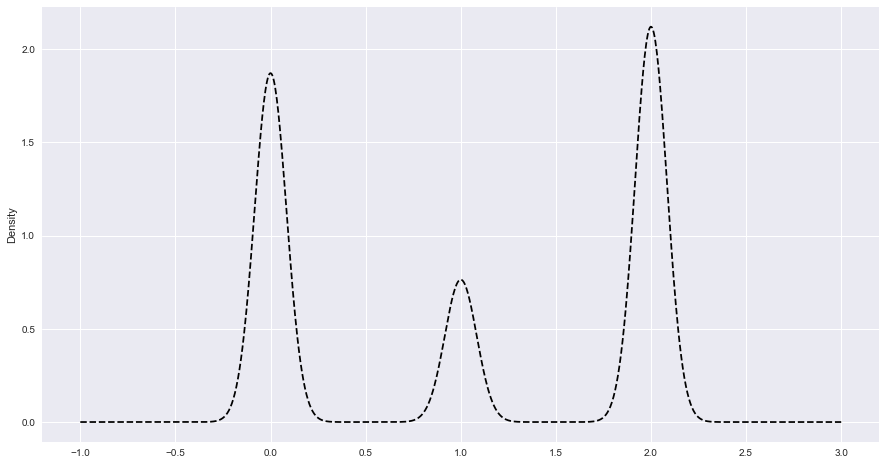

In [8]:
df['userCertify'].plot(figsize=sz, kind='kde', style='k--')

userCertify
0    60646
1    24750
2    68718
Name: name, dtype: int64


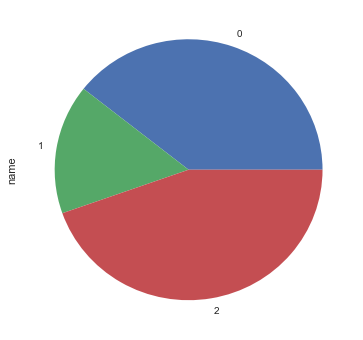

In [9]:
print(df.groupby('userCertify')['name'].count())
df.groupby('userCertify')['name'].count().plot.pie(figsize=(6, 6))

## 1.2 用户元属性：微博数、关注人数、粉丝数

### 1.2.1 微博数

27125.6481306


(0, 108502.59252241848)

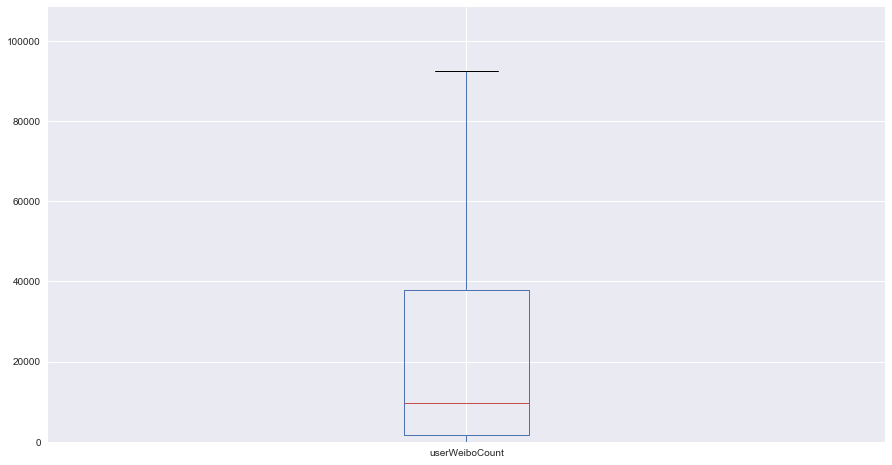

In [10]:
df['userWeiboCount'].plot.box(figsize=sz)
print(df['userWeiboCount'].mean())
plt.ylim([0, 4 * df['userWeiboCount'].mean()])

### 1.2.2 关注人数

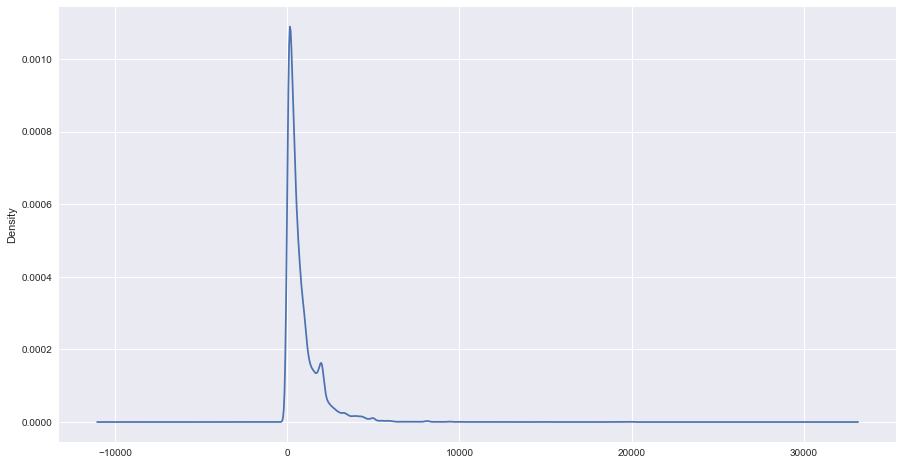

In [11]:
df['userFollowCount'].plot(figsize=sz, kind='kde')

847.080550761


(0, 2541.2416522833746)

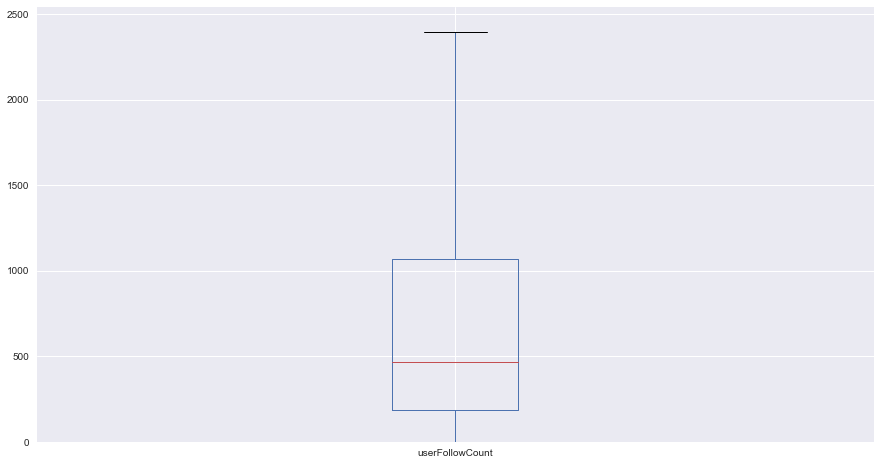

In [12]:
df['userFollowCount'].plot.box(figsize=sz)
print(df['userFollowCount'].mean())
plt.ylim([0, 3 * df['userFollowCount'].mean()])

### 1.2.3 粉丝数

2373355.70267


(0, 1186677.8513340773)

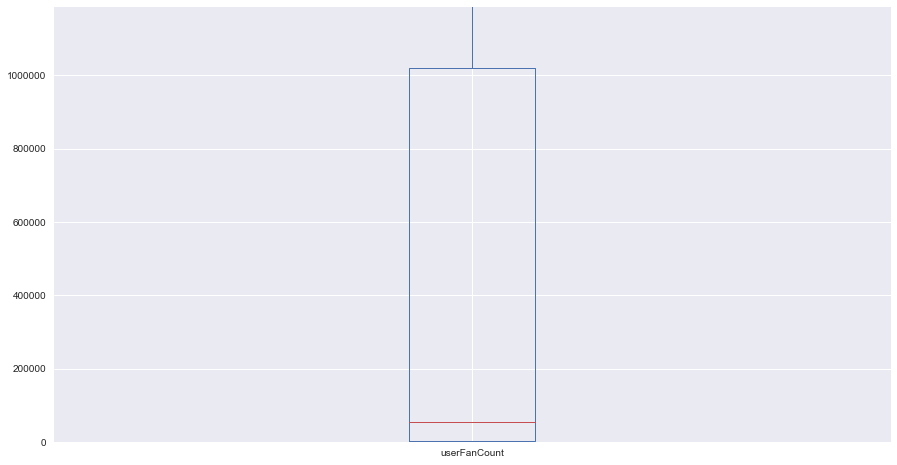

In [13]:
df['userFanCount'].plot.box(figsize=sz)
print(df['userFanCount'].mean())
plt.ylim([0, 0.5 * df['userFanCount'].mean()])

In [15]:
# df[['name', 'userFanCount']].boxplot(by='name', figsize=sz)
# lim_mean = df['userFanCount'].mean()
# print(lim_mean)
# plt.ylim([0, lim_mean])

In [67]:
# df['userFanCount'].plot.box(figsize=sz)
# print(df['userFanCount'].mean())
# plt.ylim([0, 3 * df['userFanCount'].mean()])

## 2. 传播属性：点赞量、转发量

218.92659979
376.857216087


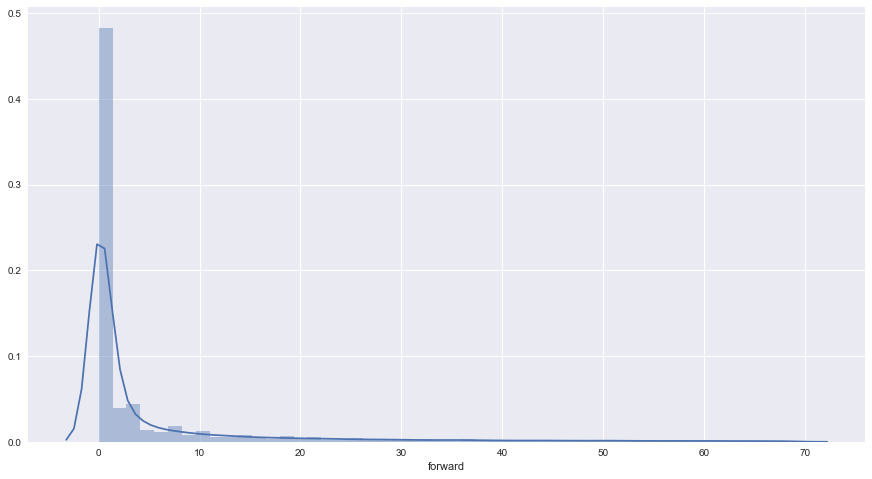

In [16]:
import numpy as np
print(df['forward'].mean())
print(df['praise'].mean())
lim_mean = max(df['forward'].mean(), df['praise'].mean())

df['forward_log'] = np.log1p(df['forward'])
df['praise_log'] = np.log1p(df['praise'])

# df[['forward', 'praise']].plot(figsize=sz, kind='kde')
# df[['forward_log','praise_log']].plot(figsize=sz, kind='kde')
# plt.xlim([0, 300 * lim_mean])

# df[['forward', 'praise']].hist(figsize=sz)
#  

plt.figure(figsize=sz)
sns.distplot(df.loc[df['forward'] < 70,'forward'])

## 3. 是否认证 => 用户元属性的影响

### 3.1 微博数

27125.6481306


(0, 162753.88878362771)

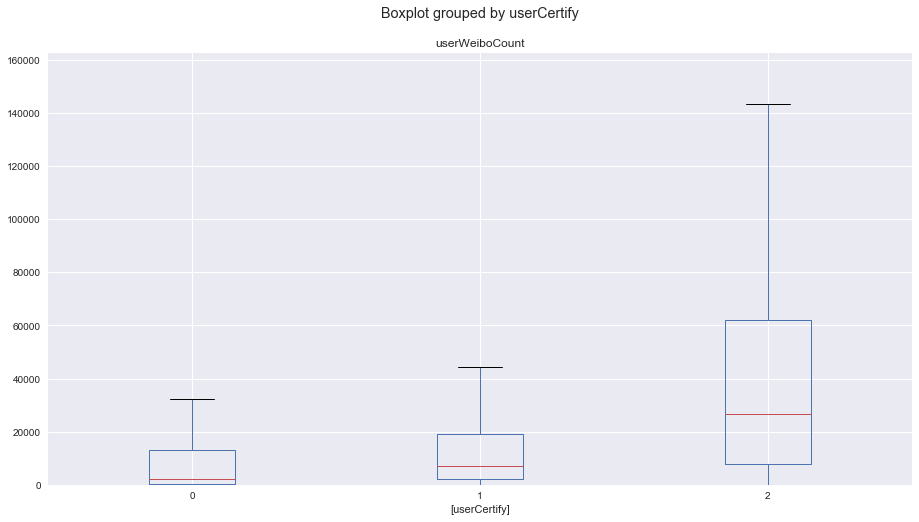

In [17]:
df[['userCertify', 'userWeiboCount']].boxplot(by='userCertify', figsize=sz)
lim_mean = df['userWeiboCount'].mean()
print(lim_mean)
plt.ylim([0, 6 * lim_mean])

In [8]:
df['userWeiboCount'].describe()

count    1.541140e+05
mean     2.712565e+04
std      1.242013e+05
min      0.000000e+00
25%      1.594000e+03
50%      9.656500e+03
75%      3.799400e+04
max      3.238033e+07
Name: userWeiboCount, dtype: float64

### 取 Log

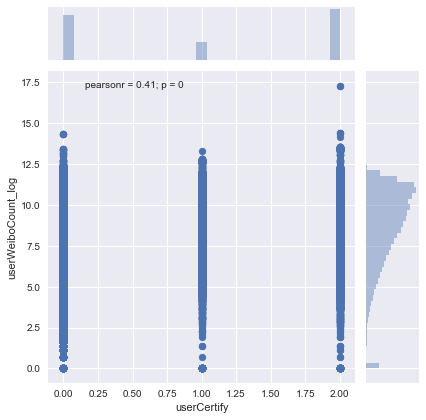

In [11]:
import numpy as np

df['userWeiboCount_log'] = np.log(df['userWeiboCount'] + 1)

plt.figure(figsize=(15,15))
sns.jointplot(x='userCertify', y="userWeiboCount_log", data=df)

### 3.2 关注人数

847.080550761


(0, 4235.4027538056243)

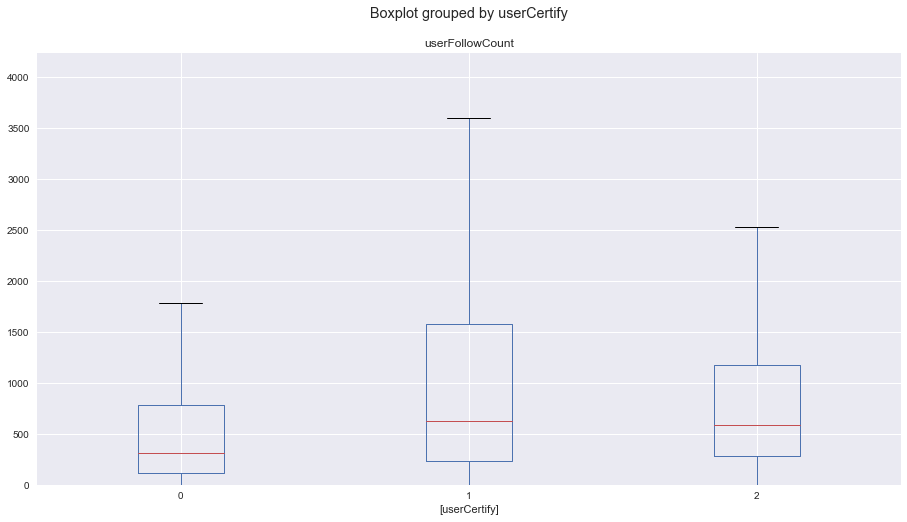

In [18]:
df[['userCertify', 'userFollowCount']].boxplot(by='userCertify', figsize=sz)
lim_mean = df['userFollowCount'].mean()
print(lim_mean)
plt.ylim([0, 5 * lim_mean])

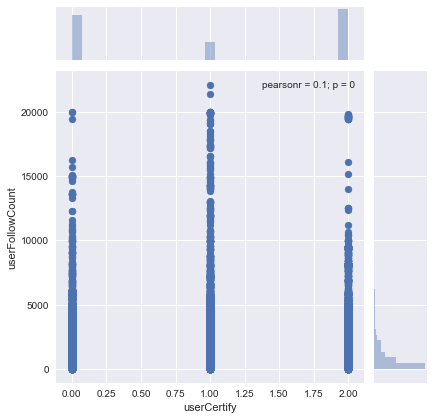

In [14]:
df['userFollowCount_log'] = np.log(df['userFollowCount'] + 1)

plt.figure(figsize=(15,15))
# sns.jointplot(x='userCertify', y="userFollowCount_log", data=df)
sns.jointplot(x='userCertify', y="userFollowCount", data=df)

### 3.3 粉丝数

2373355.70267


(0, 11866778.513340773)

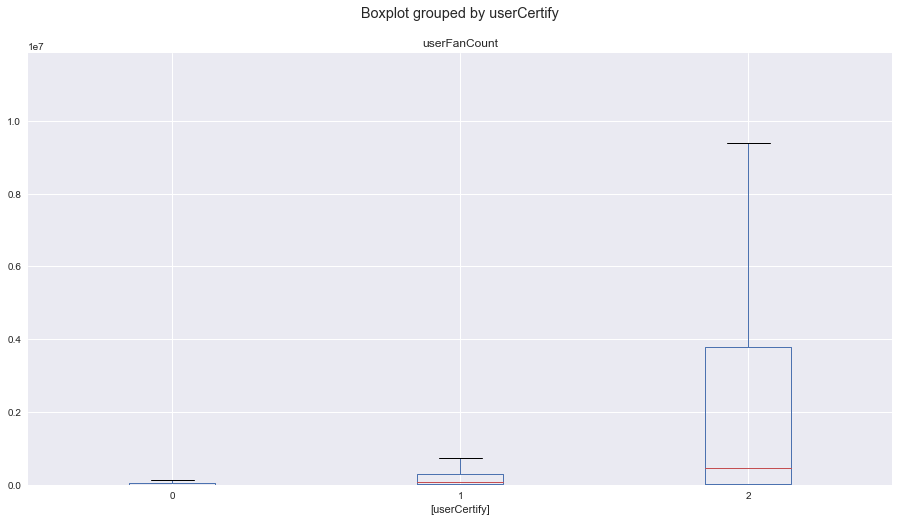

In [19]:
df[['userCertify', 'userFanCount']].boxplot(by='userCertify', figsize=sz)
lim_mean = df['userFanCount'].mean()
print(lim_mean)
plt.ylim([0, 5 * lim_mean])

2373355.70267


(0, 712006.71080044634)

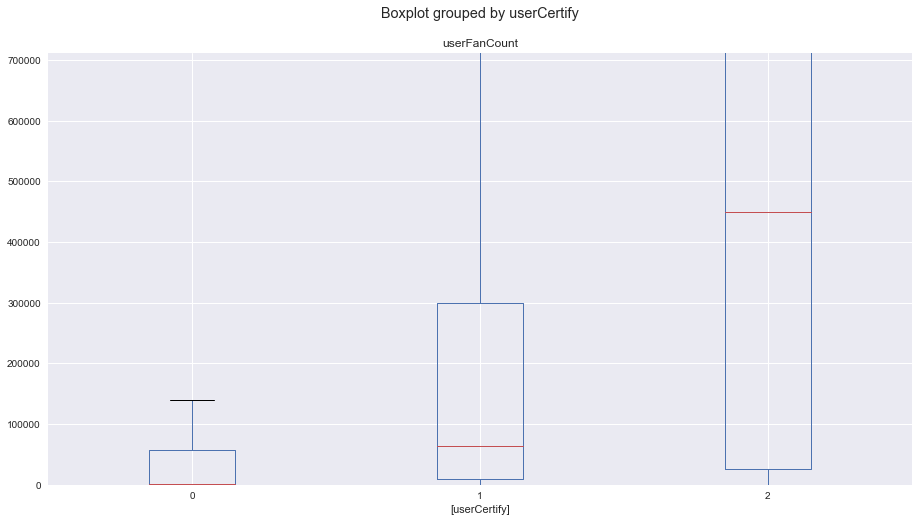

In [20]:
df[['userCertify', 'userFanCount']].boxplot(by='userCertify', figsize=sz)
lim_mean = df['userFanCount'].mean()
print(lim_mean)
plt.ylim([0, 0.3 * lim_mean])

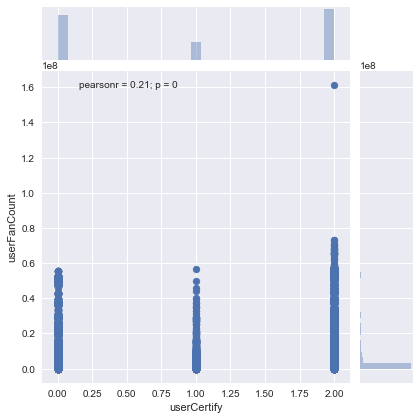

In [18]:
df['userFanCount_log'] = np.log(df['userFanCount'] + 1)

plt.figure(figsize=(15,15))
# sns.jointplot(x='userCertify', y="userFollowCount_log", data=df)
sns.jointplot(x='userCertify', y="userFanCount", data=df)

## 4. 是否认证 => 传播属性的影响

376.857216087


(0, 75.371443217358589)

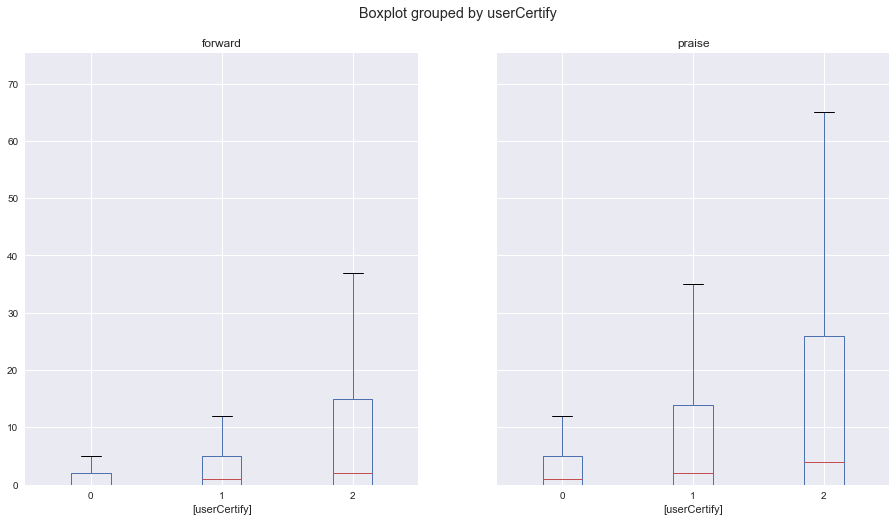

In [21]:
df[['userCertify', 'forward','praise']].boxplot(by='userCertify', figsize=sz)
lim_mean = max(df['forward'].mean(), df['praise'].mean())
print(lim_mean)
plt.ylim([0, 0.2 * lim_mean])

### 4.1 是否认证 => 转发量

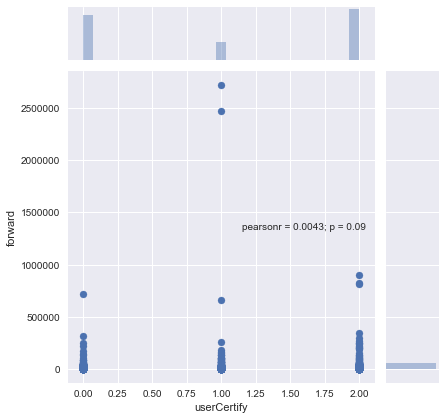

In [20]:
plt.figure(figsize=(15,15))
sns.jointplot(x='userCertify', y="forward", data=df)

### 4.2 是否认证 => 点赞量

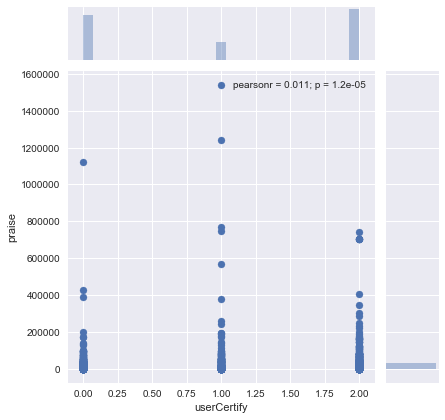

In [21]:
plt.figure(figsize=(15,15))
sns.jointplot(x='userCertify', y="praise", data=df)

# 5. 补充：图片数量特征

## 5.1 图片数量

In [29]:
df['pic_num'].describe()

count    154114.000000
mean          1.304807
std           1.958172
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          10.000000
Name: pic_num, dtype: float64

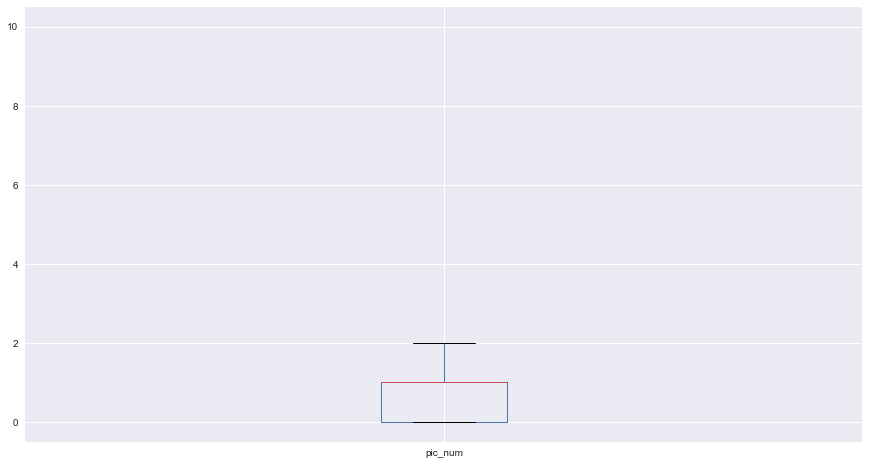

In [30]:
df['pic_num'].plot.box(figsize=sz)

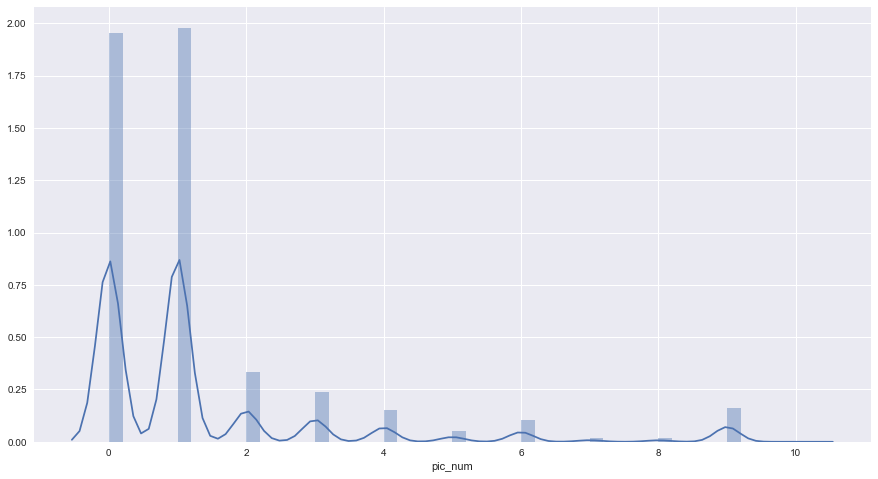

In [31]:
plt.figure(figsize=sz)
sns.distplot(df['pic_num'])

In [33]:
# df['pic_num'].plot(figsize=sz)

## 5.2 是否认证 => 图片数量

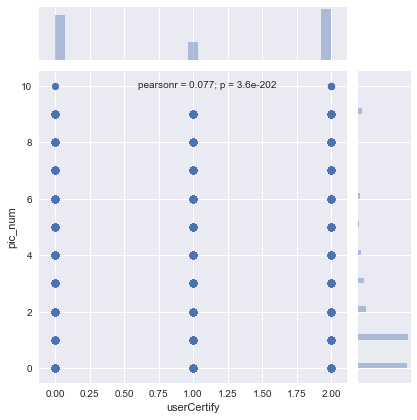

In [34]:
plt.figure(figsize=(15,15))
sns.jointplot(x='userCertify', y="pic_num", data=df)

count    154114.000000
mean          1.304807
std           1.958172
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          10.000000
Name: pic_num, dtype: float64


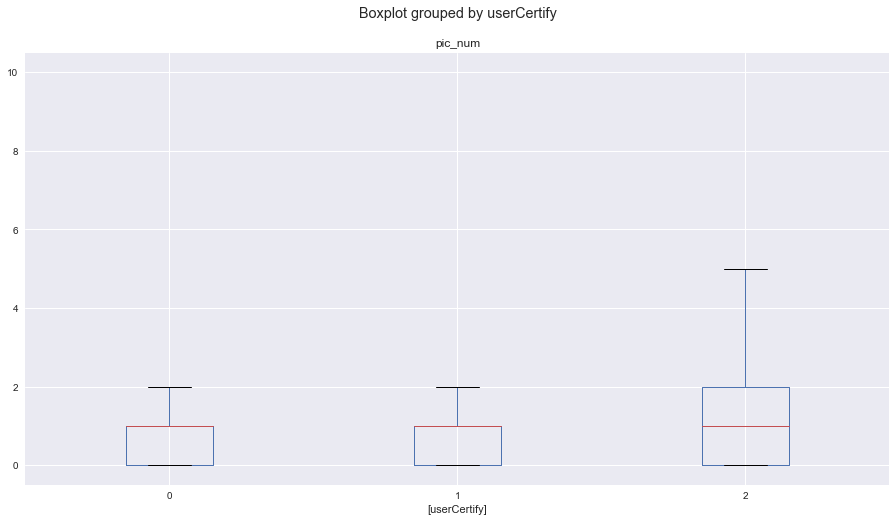

In [35]:
print(df['pic_num'].describe())
df[['userCertify', 'pic_num']].boxplot(by='userCertify', figsize=sz)

## 5.3 图片数量 => 转发、点赞量

### 5.3.1 图片数量 => 转发量

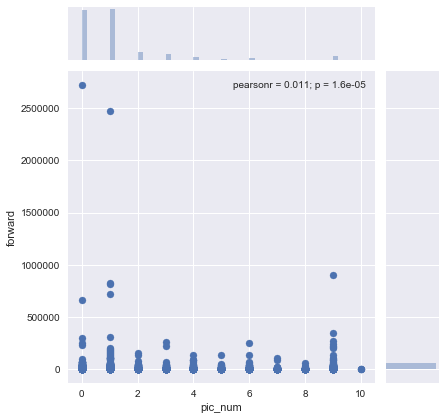

In [36]:
plt.figure(figsize=(15,15))
sns.jointplot(x='pic_num', y="forward", data=df)

### 5.3.2 图片数量 => 点赞量

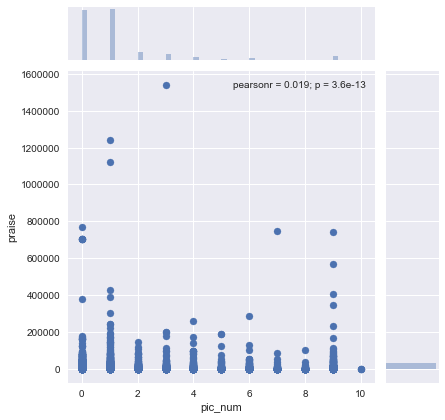

In [37]:
plt.figure(figsize=(15,15))
sns.jointplot(x='pic_num', y="praise", data=df)